In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/data'

In [3]:
import tensorflow as tf
import os
import imghdr
import cv2

In [4]:
image_ext = ['jpeg','jpg','bmp','png']

In [5]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir , image_class)):
    image_path = os.path.join(data_dir , image_class , image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        os.remove(image_path)
    except Exception as e:
      print(format(image_path))


In [6]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 306 files belonging to 2 classes.


In [7]:
data_iterater = data.as_numpy_iterator()
data_iterater.next()[0]

array([[[[1.17000000e+02, 1.20000000e+02, 1.25000000e+02],
         [1.17000000e+02, 1.20000000e+02, 1.25000000e+02],
         [1.17000000e+02, 1.20000000e+02, 1.25000000e+02],
         ...,
         [1.69589844e+02, 1.62589844e+02, 1.56589844e+02],
         [1.62304688e+02, 1.56203125e+02, 1.51101562e+02],
         [1.56550781e+02, 1.51550781e+02, 1.47550781e+02]],

        [[1.22191406e+02, 1.25191406e+02, 1.30191406e+02],
         [1.22191406e+02, 1.25191406e+02, 1.30191406e+02],
         [1.22191406e+02, 1.25191406e+02, 1.30191406e+02],
         ...,
         [1.68795593e+02, 1.61795593e+02, 1.55795593e+02],
         [1.63082047e+02, 1.55814453e+02, 1.51101562e+02],
         [1.58987640e+02, 1.51391937e+02, 1.48257172e+02]],

        [[1.24693138e+02, 1.27693138e+02, 1.32693146e+02],
         [1.26180313e+02, 1.29180313e+02, 1.34180313e+02],
         [1.27588737e+02, 1.30588745e+02, 1.35588745e+02],
         ...,
         [1.67896484e+02, 1.60896484e+02, 1.54896484e+02],
         [

In [8]:
data = data.map(lambda x , y : (x/255 , y))
scale_data = data.as_numpy_iterator()
scale_data.next()[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [9]:
scale_data.next()[0].min()

0.0

In [10]:
scale_data.next()[0].max()

1.0

In [11]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [12]:
tra = data.take(train_size)
va = data.skip(train_size).take(val_size)
te = data.skip(train_size+val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dense , MaxPooling2D

In [39]:
model = Sequential()

model.add(Conv2D(16 , (3,3) , 1 , activation = 'relu' , input_shape = (256,256,3))),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(32 , (3,3) , 1 , activation = 'relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(64 , (3,3) , 1 , activation = 'relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(128 , (3,3) , 1 , activation = 'relu')),
model.add(MaxPooling2D(2,2)),

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))

model.add(Dense(1 , activation = 'sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)       

In [41]:
model.compile(optimizer='adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [42]:
hi = model.fit(tra , epochs = 10 , validation_data = va)

Epoch 1/10
7/7 [==============================] - 24s 3s/step - loss: 0.8950 - accuracy: 0.5089 - val_loss: 0.6743 - val_accuracy: 0.5156
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 0.6399 - accuracy: 0.5491 - val_loss: 0.5900 - val_accuracy: 0.8438
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 0.5859 - accuracy: 0.7500 - val_loss: 0.5574 - val_accuracy: 0.6875
Epoch 4/10
7/7 [==============================] - 20s 3s/step - loss: 0.4348 - accuracy: 0.8348 - val_loss: 0.3951 - val_accuracy: 0.8438
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.4421 - accuracy: 0.8080 - val_loss: 0.4103 - val_accuracy: 0.8281
Epoch 6/10
7/7 [==============================] - 19s 2s/step - loss: 0.4341 - accuracy: 0.7723 - val_loss: 0.4079 - val_accuracy: 0.7969
Epoch 7/10
7/7 [==============================] - 19s 3s/step - loss: 0.3943 - accuracy: 0.8214 - val_loss: 0.3495 - val_accuracy: 0.8594
Epoch 8/10
7/7 [==================

In [43]:
import cv2

In [44]:
imgg = cv2.imread("/content/goat2.jpeg")

In [45]:
import matplotlib.pyplot as plt

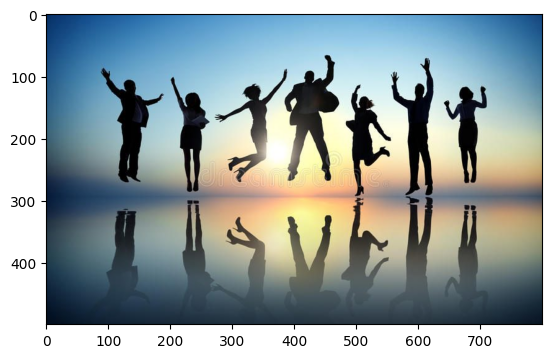

In [83]:
image = cv2.imread("/content/drive/MyDrive/data/happy/business-people-succesful-celebrating-group-successful-39416686-800x500.jpg")
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

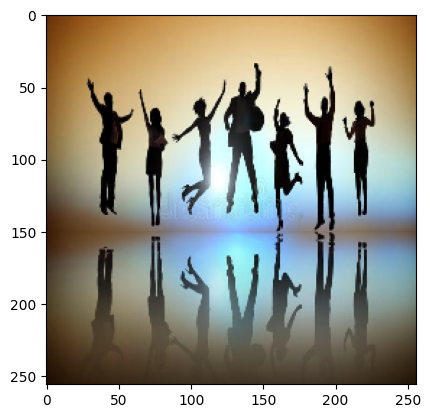

In [84]:
resize = tf.image.resize(image , (256,256))
plt.imshow(resize.numpy().astype(int))

In [85]:
y_hat = model.predict(np.expand_dims(resize / 255 , 0))
y_hat

1/1 [==============================] - 0s 201ms/step


array([[0.05834178]], dtype=float32)

In [86]:
if y_hat>0.5:
  print("sad")
else:
  print("happy")

happy
